<a href="https://colab.research.google.com/github/Nilsonavalos77/LABORATORIO-DE-AN-LISIS-DE-VENTAS/blob/main/LABORATORIO%20DE%20AN%C3%81LISIS%20DE%20VENTAS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [8]:
from google.colab import files
uploaded = files.upload()
import pandas as pd
df = pd.read_csv("supermarket_sales_150000.csv", encoding="latin1")
df.head(), df.shape,
#CORREGIR EL ERROR DE CORR()
#Para sacar la correlación solo de columnas numéricas
df.corr(numeric_only=True)


Saving supermarket_sales_150000.csv to supermarket_sales_150000 (1).csv


,loyalty_member,quantity,unit_price,subtotal,discount,tax,total
loyalty_member,1.000000,0.003891,0.000817,0.003588,0.321952,-0.010852,-0.010852
quantity,0.003891,1.000000,-0.003984,0.410232,0.108830,0.409755,0.409755
unit_price,0.000817,-0.003984,1.000000,0.811483,0.205246,0.810991,0.810991
subtotal,0.003588,0.410232,0.811483,1.000000,0.260424,0.999057,0.999057
discount,0.321952,0.108830,0.205246,0.260424,1.000000,0.218258,0.218258
tax,-0.010852,0.409755,0.810991,0.999057,0.218258,1.000000,1.000000
total,-0.010852,0.409755,0.810991,0.999057,0.218258,1.000000,1.000000


A — Ver estructura del DataFrame (inicio del ETL)

In [25]:
df = pd.read_csv("supermarket_sales_150000.csv", encoding="latin1")
df.columns = df.columns.str.replace("ï»¿", "")
df.head()


,transaction_id,datetime,date,time,store_id,city,cashier_id,customer_id,loyalty_member,product_id,category,product_name,quantity,unit_price,subtotal,discount,tax,total,payment_type,card_type
0,T00000001,2025-02-07 12:45:04,2025-02-07,12:45:04,S01,Rosario,C0117,CU005230,False,P00199,CarnicerÃ­a,Carne vacuna 1kg Var4 X X,1,1999.49,1999.49,0.0,419.89,2419.38,Tarjeta DÃ©bito,Naranja
1,T00000002,2025-01-23 15:23:22,2025-01-23,15:23:22,S04,Salta,C0137,NaN,False,P00181,LÃ¡cteos,Yogur 200g Var3 X,2,149.33,298.66,0.0,62.72,361.38,Tarjeta CrÃ©dito,MasterCard
2,T00000003,2025-03-06 16:10:29,2025-03-06,16:10:29,S07,Formosa,C0139,NaN,False,P00165,Higiene,Cepillo dental Var4 X,1,323.06,323.06,0.0,67.84,390.90,Tarjeta DÃ©bito,Visa
3,T00000004,2024-11-17 12:51:20,2024-11-17,12:51:20,S07,Buenos Aires,C0138,CU037171,False,P00017,Bebidas,Bebida isotÃ³nica Var1,1,134.33,134.33,0.0,28.21,162.54,Tarjeta CrÃ©dito,Naranja
4,T00000005,2025-01-13 22:16:08,2025-01-13,22:16:08,S04,Salta,C0288,CU038312,False,P00138,Higiene,Shampoo 400ml Var2,1,381.76,381.76,0.0,80.17,461.93,Tarjeta DÃ©bito,MasterCard


In [3]:
# Ver primeras filas
df.head()

# Ver estructura
df.info()

# Ver dimensiones
df.shape

# Ver nombres de columnas
df.columns


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150000 entries, 0 to 149999
Data columns (total 20 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   transaction_id  150000 non-null  object 
 1   datetime        150000 non-null  object 
 2   date            150000 non-null  object 
 3   time            150000 non-null  object 
 4   store_id        150000 non-null  object 
 5   city            150000 non-null  object 
 6   cashier_id      150000 non-null  object 
 7   customer_id     97555 non-null   object 
 8   loyalty_member  150000 non-null  bool   
 9   product_id      150000 non-null  object 
 10  category        150000 non-null  object 
 11  product_name    150000 non-null  object 
 12  quantity        150000 non-null  int64  
 13  unit_price      150000 non-null  float64
 14  subtotal        150000 non-null  float64
 15  discount        150000 non-null  float64
 16  tax             150000 non-null  float64
 17  total     

Index(['transaction_id', 'datetime', 'date', 'time', 'store_id', 'city',
       'cashier_id', 'customer_id', 'loyalty_member', 'product_id', 'category',
       'product_name', 'quantity', 'unit_price', 'subtotal', 'discount', 'tax',
       'total', 'payment_type', 'card_type'],
      dtype='object')

B — Limpieza de datos (Transformar)

In [4]:
#Eliminar dulicados
df = df.drop_duplicates()

#Detectar faltantes
df.isna().sum()

#Corregir tipos de datos
for col in df.columns:
    try:
        df[col] = pd.to_numeric(df[col], errors="ignore")
    except:
        pass



/tmp/ipython-input-963453549.py:10: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_numeric without passing `errors` and catch exceptions explicitly instead
  df[col] = pd.to_numeric(df[col], errors="ignore")


C — Crear nuevas variables derivadas

In [6]:
#Crear “ingreso por unidad” (precio real por unidad con impuestos y descuentos)
df['precio_unit_final'] = df['total'] / df['quantity']

#Crear “margen de impuesto sobre el total”
df['porc_impuesto'] = (df['tax'] / df['total']) * 100







3. EDA – Análisis Exploratorio

In [13]:

#Info general
df.describe()
df.info()

#Correlación (solo numéricas)
df.corr(numeric_only=True)



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150000 entries, 0 to 149999
Data columns (total 20 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   transaction_id  150000 non-null  object 
 1   datetime        150000 non-null  object 
 2   date            150000 non-null  object 
 3   time            150000 non-null  object 
 4   store_id        150000 non-null  object 
 5   city            150000 non-null  object 
 6   cashier_id      150000 non-null  object 
 7   customer_id     97555 non-null   object 
 8   loyalty_member  150000 non-null  bool   
 9   product_id      150000 non-null  object 
 10  category        150000 non-null  object 
 11  product_name    150000 non-null  object 
 12  quantity        150000 non-null  int64  
 13  unit_price      150000 non-null  float64
 14  subtotal        150000 non-null  float64
 15  discount        150000 non-null  float64
 16  tax             150000 non-null  float64
 17  total     

,loyalty_member,quantity,unit_price,subtotal,discount,tax,total
loyalty_member,1.000000,0.003891,0.000817,0.003588,0.321952,-0.010852,-0.010852
quantity,0.003891,1.000000,-0.003984,0.410232,0.108830,0.409755,0.409755
unit_price,0.000817,-0.003984,1.000000,0.811483,0.205246,0.810991,0.810991
subtotal,0.003588,0.410232,0.811483,1.000000,0.260424,0.999057,0.999057
discount,0.321952,0.108830,0.205246,0.260424,1.000000,0.218258,0.218258
tax,-0.010852,0.409755,0.810991,0.999057,0.218258,1.000000,1.000000
total,-0.010852,0.409755,0.810991,0.999057,0.218258,1.000000,1.000000


4. EDA – Gráficos

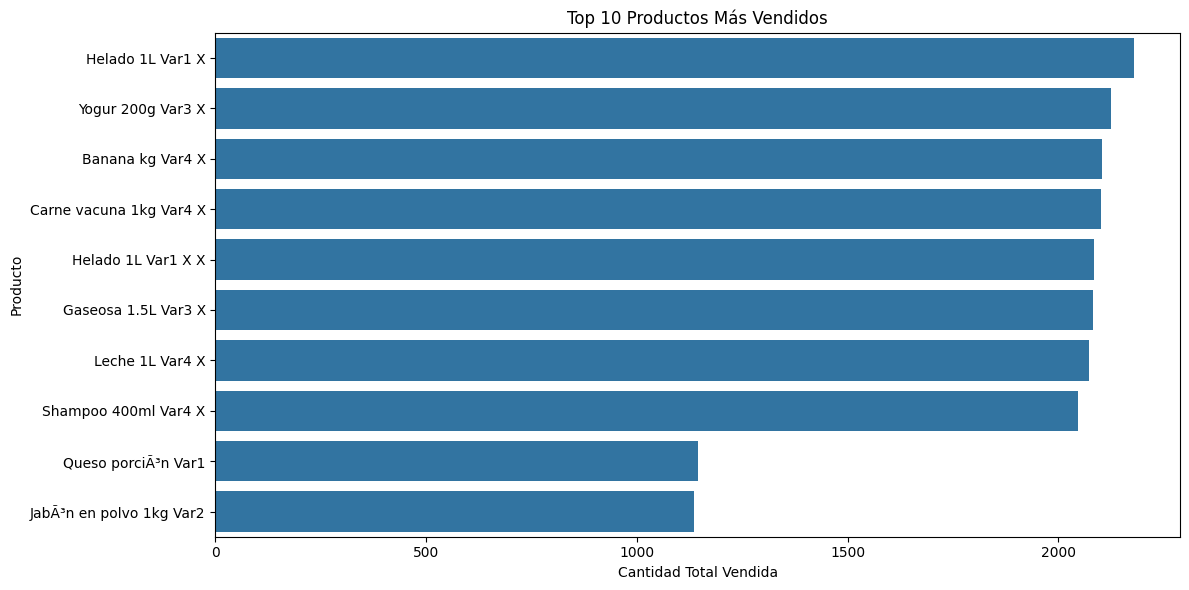

In [15]:
#Top 10 productos más vendidos (por cantidad)

top_productos = df.groupby('product_name')['quantity'].sum().sort_values(ascending=False).head(10)

plt.figure(figsize=(12,6))
sns.barplot(x=top_productos.values, y=top_productos.index)
plt.title('Top 10 Productos Más Vendidos')
plt.xlabel('Cantidad Total Vendida')
plt.ylabel('Producto')
plt.tight_layout()
plt.show()



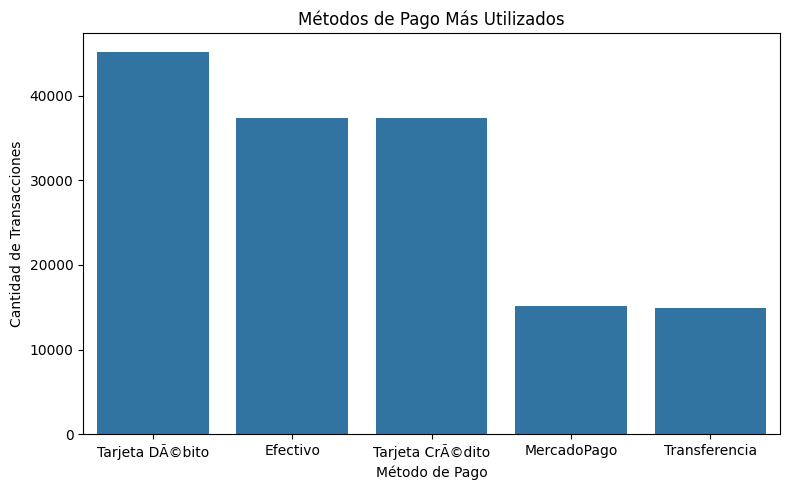

In [16]:
#Métodos de pago más utilizados

payment_counts = df['payment_type'].value_counts()

plt.figure(figsize=(8,5))
sns.barplot(x=payment_counts.index, y=payment_counts.values)
plt.title('Métodos de Pago Más Utilizados')
plt.xlabel('Método de Pago')
plt.ylabel('Cantidad de Transacciones')
plt.tight_layout()
plt.show()


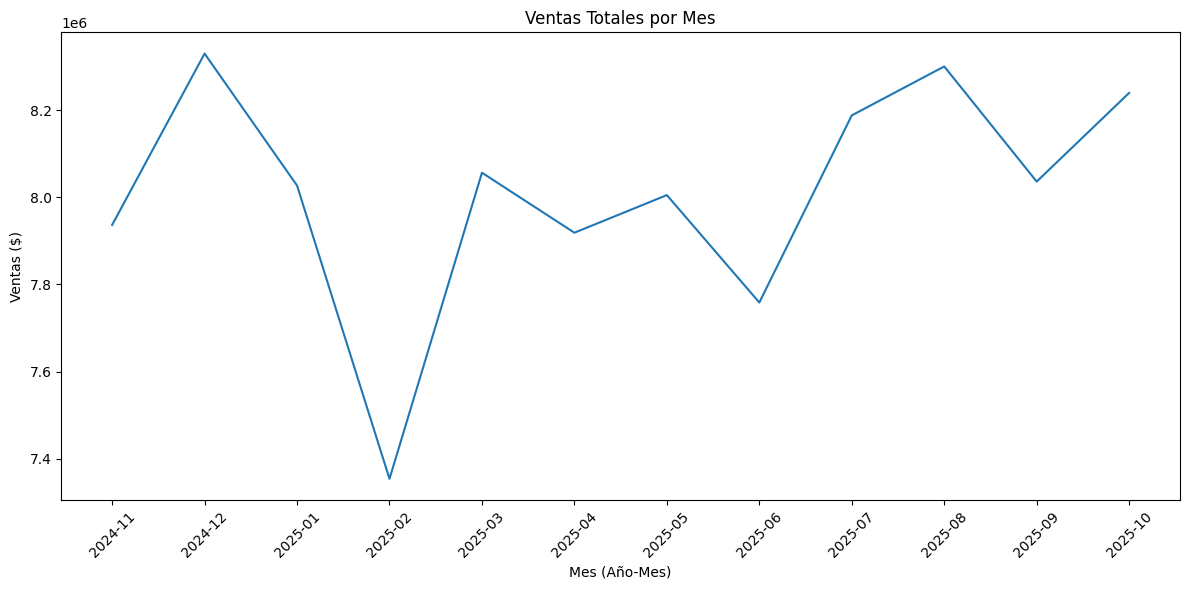

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns

# Asegurar que la columna 'date' sea tipo fecha
df['date'] = pd.to_datetime(df['date'], errors='coerce')

# Crear columna año-mes
df['year_month'] = df['date'].dt.to_period('M').astype(str)

# Agrupar ventas por año-mes
ventas_mensuales = df.groupby('year_month')['total'].sum()

# Gráfico
plt.figure(figsize=(12,6))
sns.lineplot(x=ventas_mensuales.index, y=ventas_mensuales.values)
plt.xticks(rotation=45)
plt.title('Ventas Totales por Mes')
plt.xlabel('Mes (Año-Mes)')
plt.ylabel('Ventas ($)')
plt.tight_layout()
plt.show()


3. Preguntas de Negocio

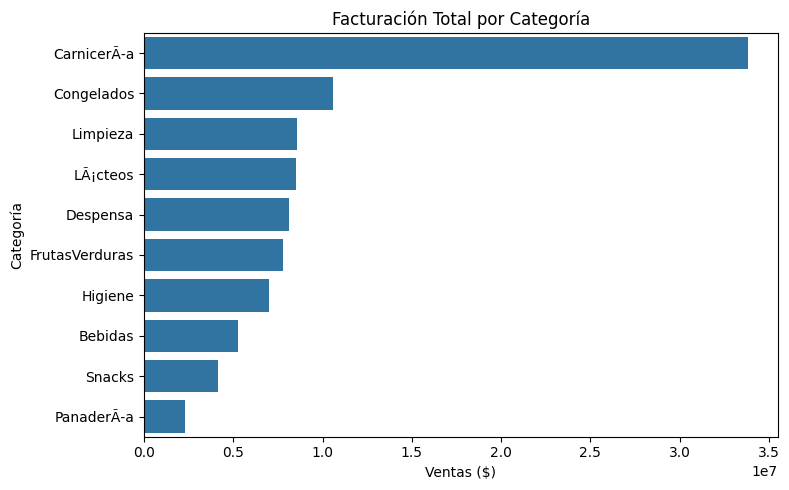

In [24]:
#Pregunta 1
#Qué categoría genera mayor facturación total?
ventas_categoria = df.groupby('category')['total'].sum().sort_values(ascending=False)
ventas_categoria

#Gráfico:
plt.figure(figsize=(8,5))
sns.barplot(x=ventas_categoria.values, y=ventas_categoria.index)
plt.title('Facturación Total por Categoría')
plt.xlabel('Ventas ($)')
plt.ylabel('Categoría')
plt.tight_layout()
plt.show()

#La categoría con mayor facturación es la de carniceria, lo que indica
#que es el producto más importante para el negocio. Esto sugiere enfocar campañas,
#stock y promociones en esa categoría para aumentar ingresos

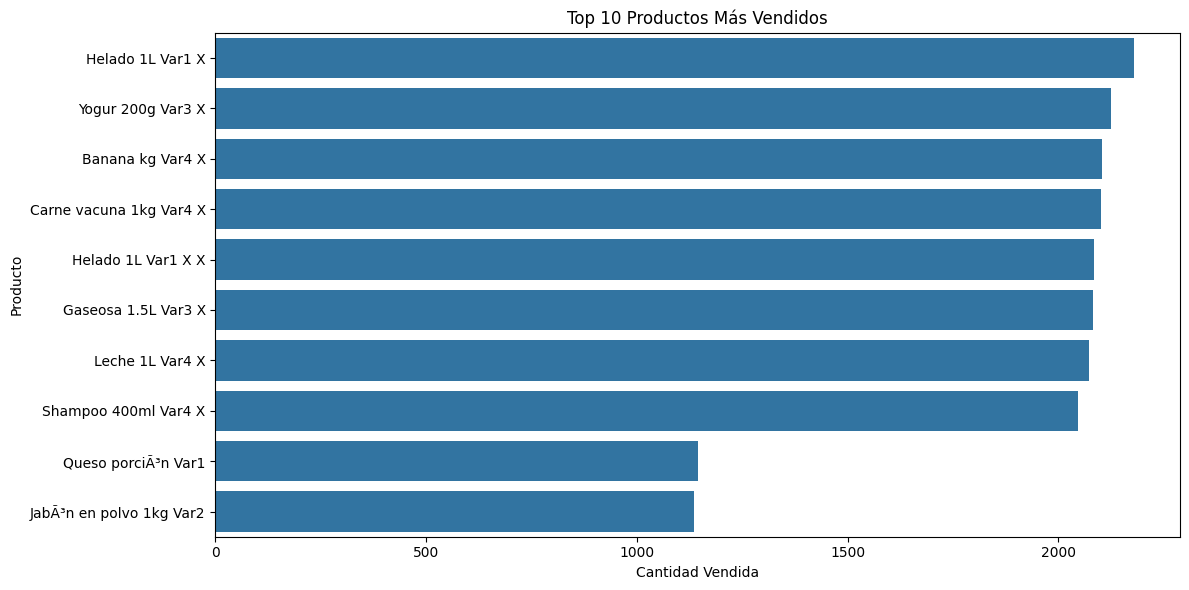

In [21]:
#Pregunta 2
#¿Cuáles son los 10 productos más vendidos por cantidad?
top10 = df.groupby('product_name')['quantity'].sum().sort_values(ascending=False).head(10)
top10

#Gráfico:
plt.figure(figsize=(12,6))
sns.barplot(x=top10.values, y=top10.index)
plt.title('Top 10 Productos Más Vendidos')
plt.xlabel('Cantidad Vendida')
plt.ylabel('Producto')
plt.tight_layout()
plt.show()

#Interpretación:

#Los productos del Top 10 son los de mayor rotación. Representan una parte clave de las ventas y deben estar siempre en stock. También son candidatos para promociones y packs.

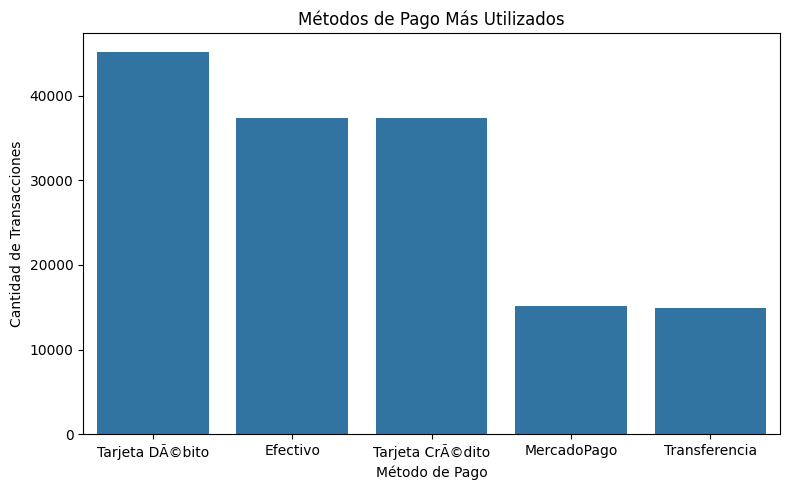

In [23]:
#Pregunta 3
#¿Cuál es el método de pago más utilizado por los clientes?
pagos = df['payment_type'].value_counts()
pagos

#Gráfico:
plt.figure(figsize=(8,5))
sns.barplot(x=pagos.index, y=pagos.values)
plt.title('Métodos de Pago Más Utilizados')
plt.xlabel('Método de Pago')
plt.ylabel('Cantidad de Transacciones')
plt.tight_layout()
plt.show()

#Interpretación:

#El método de pago más utilizado es de tarjeta de debito, lo que indica preferencia del público. Esto puede ayudar al negocio a decidir qué medios potenciar, qué promociones ofrecer y dónde reducir fricción en pagos.